# Console Saas data V1 Jupyter notebook

    this notebook is for visualizing trends, calculating activity rates within different user_id 
    and clients combinations ,and finally generating new datasets with the obtained activity rate results.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline 
import matplotlib.pyplot as plt

import datetime as dt


## 2. Load Saas Events Data

In [2]:
from config import *
#raw_saas_path  
#print(raw_saas_path) for testing
#proc_saas_path  
#RabbitMQ paths
#raw_evts_path  
#proc_evts_path  

#function for loading data
def load_data(csv_path):
    return pd.read_csv(csv_path,parse_dates=['timestamp'] ,
                       index_col=['timestamp'])#comment if timestamp indexing not wanted

sas_data = load_data(raw_saas_v1)

sas_data.rename(columns={'clients_codes.0': 'cl0', 'clients_codes.1': 'cl1',
                         'clients_codes.2': 'cl2','clients_codes.3': 'cl3',
                         'clients_codes.4': 'cl4'}, inplace=True)

In [3]:
sas_data.head()

,_id,event_type,user_id,user_type,cl0,cl1,cl2,cl3,cl4,profiles.0.role_code,...,profiles.1.application_code,profiles.2.role_code,profiles.2.application_code,profiles.3.role_code,profiles.3.application_code,profiles.4.role_code,profiles.4.application_code,profiles.5.role_code,profiles.5.application_code,_class
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-17 07:05:34.725000+00:00,5e7b882dd21b7c58687083a4,USER_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:05:42.191000+00:00,5e7b882dd21b7c58687083a5,PROFILE_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:06:29.054000+00:00,5e7b882dd21b7c58687083a6,USER_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:06:36.717000+00:00,5e7b882dd21b7c58687083a7,PROFILE_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:06:47.609000+00:00,5e7b882dd21b7c58687083a8,USER_UPDATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...


In [4]:
print('SAAS total size ')
print(sas_data.shape)
print('')
print('SAAS  columns')
print(sas_data.columns)

SAAS total size 
(112459, 22)

SAAS  columns
Index(['_id', 'event_type', 'user_id', 'user_type', 'cl0', 'cl1', 'cl2', 'cl3',
       'cl4', 'profiles.0.role_code', 'profiles.0.application_code',
       'profiles.1.role_code', 'profiles.1.application_code',
       'profiles.2.role_code', 'profiles.2.application_code',
       'profiles.3.role_code', 'profiles.3.application_code',
       'profiles.4.role_code', 'profiles.4.application_code',
       'profiles.5.role_code', 'profiles.5.application_code', '_class'],
      dtype='object')


In [5]:
print('SAAS Data starting date ')
print(sas_data.index.min())
print('')
print('SAAS Data Ending date')
print(sas_data.index.max())

SAAS Data starting date 
2019-05-17 07:05:34.725000+00:00

SAAS Data Ending date
2020-03-25 15:02:23.561000+00:00


## 3. Compose temporal features from Data

In [6]:
#df = df.tz_localize(None) # removing the timezone information resulting in naive local time
#df.reset_index(drop=False ,inplace=True)
#df['date']=df['timestamp']

df = sas_data.copy()

df['year'] = df.index.year
df['week'] = df.index.week
 
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['minutes'] = df.index.minute
df['secondes'] = df.index.second

df['count'] = 0


In [7]:
df

,_id,event_type,user_id,user_type,cl0,cl1,cl2,cl3,cl4,profiles.0.role_code,...,profiles.5.application_code,_class,year,week,month,day,hour,minutes,secondes,count
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-17 07:05:34.725000+00:00,5e7b882dd21b7c58687083a4,USER_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,5,34,0
2019-05-17 07:05:42.191000+00:00,5e7b882dd21b7c58687083a5,PROFILE_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,5,42,0
2019-05-17 07:06:29.054000+00:00,5e7b882dd21b7c58687083a6,USER_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,6,29,0
2019-05-17 07:06:36.717000+00:00,5e7b882dd21b7c58687083a7,PROFILE_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,6,36,0
2019-05-17 07:06:47.609000+00:00,5e7b882dd21b7c58687083a8,USER_UPDATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,6,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25 14:28:45.488000+00:00,5e7b88e1d21b7c5868723aea,PROFILE_DELETED,442949,STANDARD,247226,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,13,3,25,14,28,45,0
2020-03-25 15:00:19.797000+00:00,5e7b88e1d21b7c5868723aeb,USER_CREATED,458731,STANDARD,266385,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,13,3,25,15,0,19,0
2020-03-25 15:00:39.514000+00:00,5e7b88e1d21b7c5868723aec,USER_UPDATED,435623,STANDARD,20810,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,13,3,25,15,0,39,0


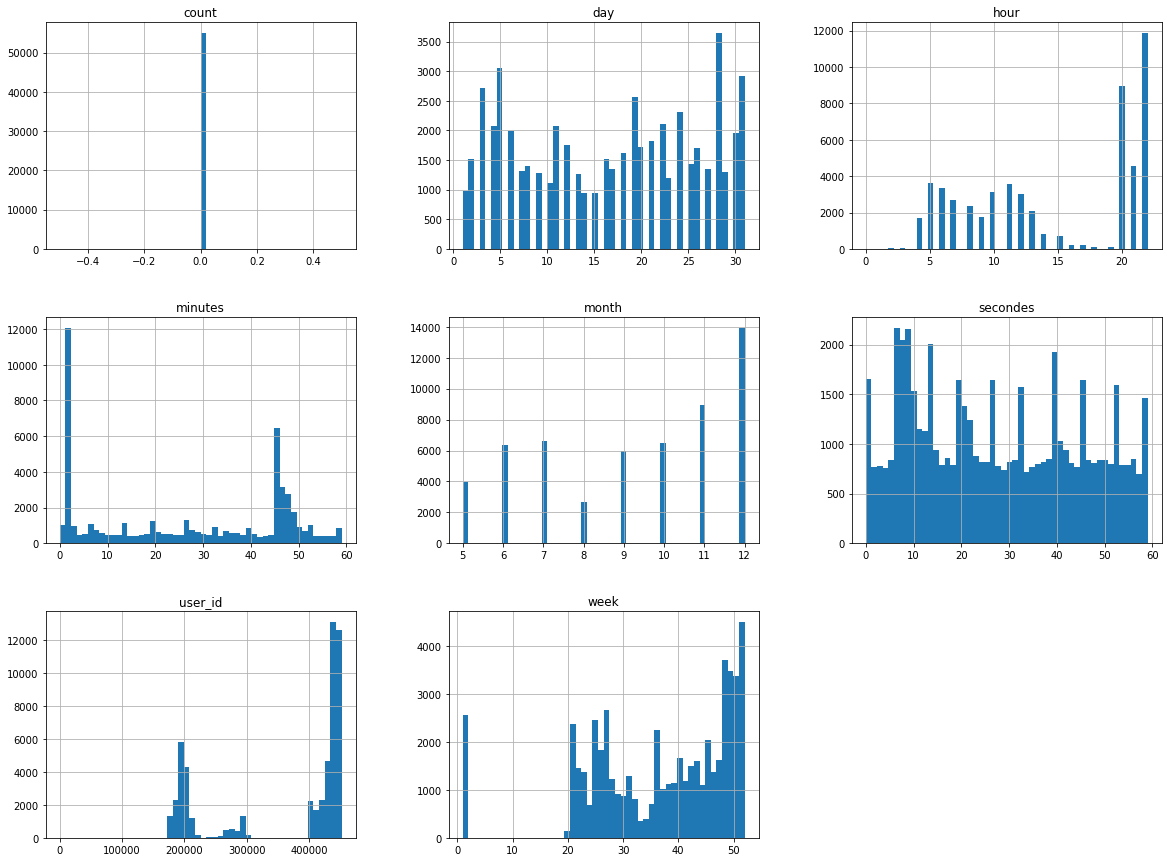

In [8]:
rec_2019 = df.loc['2019-01-01':'2019-12-31']
rec_2019 = rec_2019.drop(['year' ] ,axis=1)

rec_2019.hist(bins=50, figsize=(20,15))
plt.show()

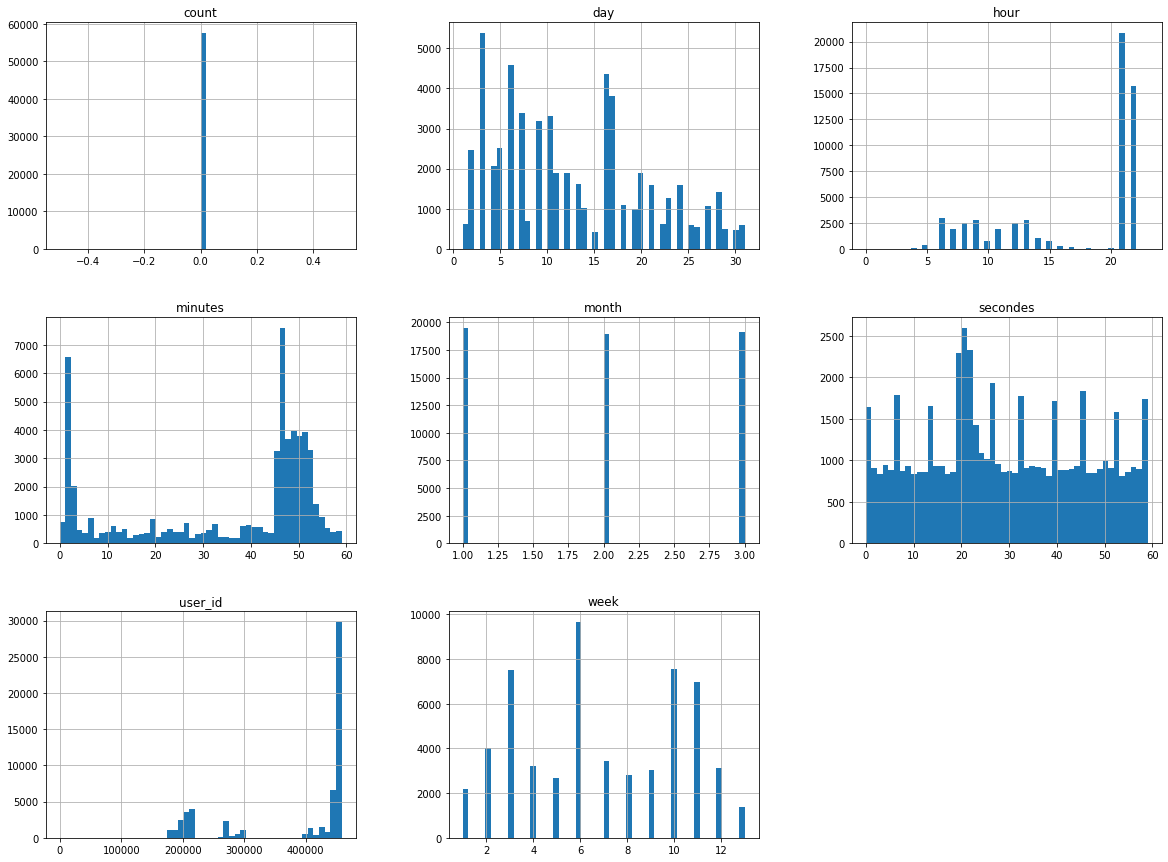

In [9]:
rec_2020 = df.loc['2020-01-01':'2020-03-30']
rec_2020 = rec_2020.drop(['year' ] ,axis=1)

rec_2020.hist(bins=50, figsize=(20,15))
plt.show()

## 4. Some study of data statistical properties

### Function 1 using the 3*std  approach for outlier  detection

In [10]:
import numpy as np
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    print('DATA MEAN :')
    print(random_data_mean)
    print('  STD : ')
    print( random_data_std)
    
    # Set upper and lower limit to 3 standard deviation
    anomaly_cut_off = random_data_std * 3
    print("")
    print(' Anomaly_cut_off value (aka std * 3 value) ')
    print(anomaly_cut_off)
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print("")
    print("   LIMIT VALUES  :")
    print('upper_limit value')
    print(upper_limit)
    print('lower_limit value')
    print(lower_limit)
    
    # Find outliers
    anomalies = []
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return upper_limit,anomalies

### using the Mean Absolute Deviation for outlier detection

     the presence of outliers is likely to have a strong effect on the mean and the standard deviation, making this technique unreliable. 
 
    This occurs because the statistics of centre and distance—the mean and standard deviation, respectively—that we're using to spot outliers… are themselves strongly affected by outliers. The crux of the problem is that the standard deviation is based on squared distances, so extreme points are much more influential than those close to the mean.

    therefore, using a measure of distance that's robust against outliers. 
    
    A good candidate for this job is *the median absolute deviation from median* ,commonly shortened to the median 
    absolute deviation (MAD). It is the median of the set comprising the absolute values of the differences between the median and each data point. 

    One of the commonest ways of finding outliers in one-dimensional data is to mark as a potential outlier any 
    point that is more than two standard deviations, say, from the mean (I am referring to sample means and
    standard deviations here and in what follows).
    But the presence of outliers is likely to have a strong effect on the mean and the standard deviation, making 
    this technique unreliable.

In [11]:
def mad_Median(points, thresh=3.5):
    """"References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    
    diff = np.sum( ( points - median)**2 , axis=-1)
    diff = np.sqrt(diff)
    
    med_abs_deviation = np.median(diff)
    
    print("med_abs_deviation")
    print(med_abs_deviation)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    #0.6745 is the 0.75th quartile of the standard normal distribution, to which the MAD converges to.
    
    print('modified_z_score')
    print(modified_z_score)
    print("")
    
    return modified_z_score > thresh

## 2019 Activity rate (Hourly Rate)

COUNT MAX :
224

 2019 Groupped Data
                                             count
year month day hour user_id event_type            
2019 5     17  7    289437  USER_UPDATED         1
                    409571  USER_UPDATED         1
                    410441  USER_UPDATED         1
                    423141  USER_UPDATED         2
                    423144  USER_UPDATED         2
...                                            ...
     12    31  22   452020  PROFILE_UPDATED      1
                    452044  PROFILE_UPDATED      1
                    452075  PROFILE_UPDATED      1
                    452077  PROFILE_UPDATED      1
                    452127  PROFILE_UPDATED      6

[29704 rows x 1 columns]
-------------USING THE STANDARD DEVIATION-------------------
DATA MEAN :
1.8489429033126852
  STD : 
4.0276248097474445

 Anomaly_cut_off value (aka std * 3 value) 
12.082874429242334

   LIMIT VALUES  :
upper_limit value
13.93181733255502
lower_limit value
-10.233931525929

C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


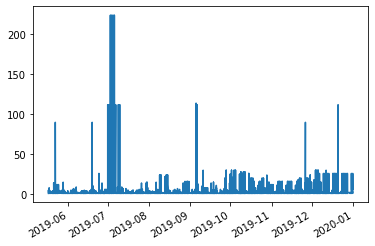

In [12]:
groupped_data_19 = df['2019'].groupby(['year','month','day','hour','user_id','event_type']).agg({'count': 'size'})
#groupped_data_19["%"] = groupped_data_19.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = (groupped_data_19.max()).iloc[0]
print(m)
print("")
print(" 2019 Groupped Data")
print(groupped_data_19)

print("-------------USING THE STANDARD DEVIATION-------------------")
upper_limit , anom = find_anomalies(groupped_data_19['count'])
print("---------------------------------------------")

print("")
print('events outside of the [ mean()+-3*STD ] during an hour of a given day ')
print(groupped_data_19[ groupped_data_19['count'] > upper_limit ])
print("---------------------------------------------")

print("")
print("-------------USING THE MAD-------------------")
arr = mad_Median((groupped_data_19['count']))

print("")
print('events outside of the MAD during an hour of a given day ')
print(groupped_data_19[ arr ])




groupped_data_19.reset_index(drop=False ,inplace= True)
dm = groupped_data_19.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], x['hour']), axis=1)
dm['count'].plot()

## 2020 Activity rate (Hourly Rate)

COUNT MAX :
280

 2020 Groupped Data
                                             count
year month day hour user_id event_type            
2020 1     1   21   176212  PROFILE_UPDATED      1
                    176911  PROFILE_UPDATED      1
                    177988  PROFILE_UPDATED      1
                    178131  PROFILE_UPDATED      1
                    179157  PROFILE_UPDATED      1
...                                            ...
     3     25  14   444470  PROFILE_DELETED      1
               15   435623  PROFILE_UPDATED      1
                            USER_UPDATED         1
                    458731  PROFILE_CREATED      1
                            USER_CREATED         1

[22596 rows x 1 columns]
---------------------------------------------
DATA MEAN :
2.5463798902460613
  STD : 
6.539503696593259

 Anomaly_cut_off value (aka std * 3 value) 
19.61851108977978

   LIMIT VALUES  :
upper_limit value
22.16489098002584
lower_limit value
-17.072131199533718
-------------

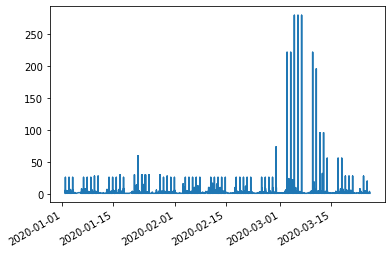

In [13]:
groupped_data_20 = df['2020'].groupby(['year','month','day','hour','user_id','event_type']).agg({'count': 'size'})
#groupped_data_20["%"] = groupped_data_20.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = (groupped_data_20.max()).iloc[0]
print(m)
print("")
print(" 2020 Groupped Data")
print(groupped_data_20)

print("---------------------------------------------")
upper_limit , anom = find_anomalies(groupped_data_20['count'])
print("---------------------------------------------")

print("")
print('events outside of the upper limit during an hour of a given day ')
print(groupped_data_20[ groupped_data_20['count'] > upper_limit ])


groupped_data_20.reset_index(drop=False ,inplace= True)
dm = groupped_data_20.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], x['hour']), axis=1)
dm['count'].plot()

# All activity analysis 

## All activity analysis (minutes rate)

In [14]:
groupped_data = df.groupby(['year','month','day','hour','minutes','user_id','event_type']).agg({'count': 'size'})

print('COUNT MAX :')
m=(groupped_data.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
print(max_act)

print("")
print("user_id with maximum activity count ")
max_act.reset_index(drop=False, inplace=True)
user_id = max_act['user_id'].iloc[0]
print(user_id)

print("---------------------------------------------------")

anom_user = df[df["user_id"] == user_id]
#anom_user = anom_user['2019']
clients = anom_user[['cl0','cl1','cl2','cl3','cl4']]
cl0 = anom_user['cl0']
cl1 = anom_user['cl1']
cl2 = anom_user['cl2']
cl3 = anom_user['cl3']
cl4 = anom_user['cl4']

print('client 0 ')
#print(cl0.value_counts())
print(cl0)
print('client 1 ')
#print(cl1.value_counts())
print(cl1)

print('client 2 ')
#print(cl2.value_counts())
print(cl2)

print('client 3 ')
print(cl3.value_counts())
print('client 4 ')
print(cl4.value_counts())

print("---------------------------------------------------")
upper_limit , anom = find_anomalies(groupped_data['count'])
print("")
print('number of events superior than the upper_limit( minutes based) ')
print(groupped_data[groupped_data['count']> upper_limit ])

print("---------------------------------------------------")

groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)
dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)
#dm['count'].plot()




COUNT MAX :
128

Maximum Activity details: 
                                                     count
year month day hour minutes user_id event_type            
2020 3     4   21   53      269770  PROFILE_UPDATED    128

user_id with maximum activity count 
269770
---------------------------------------------------
client 0 
timestamp
2020-02-28 21:47:35.172000+00:00    54041
2020-02-28 21:47:35.582000+00:00    54041
2020-02-28 21:47:36.013000+00:00    54041
2020-02-28 21:47:36.354000+00:00    54041
2020-02-28 21:47:36.787000+00:00    54041
                                    ...  
2020-03-17 22:48:03.365000+00:00    41763
2020-03-17 22:48:03.638000+00:00    41763
2020-03-17 22:48:04.241000+00:00    41763
2020-03-17 22:48:04.537000+00:00    41763
2020-03-17 22:48:05.166000+00:00    41763
Name: cl0, Length: 2022, dtype: object
client 1 
timestamp
2020-02-28 21:47:35.172000+00:00      NaN
2020-02-28 21:47:35.582000+00:00      NaN
2020-02-28 21:47:36.013000+00:00      NaN
2020-02-28 21:4

### Visualization within a specific timespan

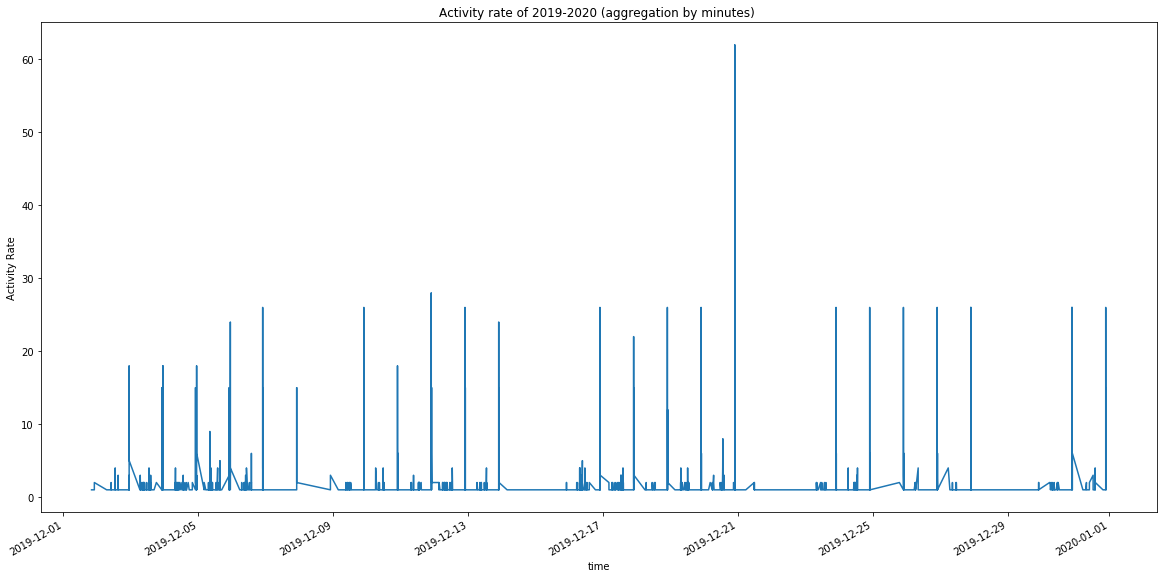

In [15]:

dm2 = dm.loc['2019-12-01':'2019-12-31']#specify the time time period from .. to ..
dm2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Activity rate of 2019-2020 (aggregation by minutes) ')
plt.ylabel('Activity Rate')
plt.xlabel('time')

plt.show() 

## All activity hourly rate

COUNT MAX :
280

Maximum Activity details: 
                                             count
year month day hour user_id event_type            
2020 3     4   21   269770  PROFILE_UPDATED    280
           5   21   269770  PROFILE_UPDATED    280
           6   21   269770  PROFILE_UPDATED    280

user_id with maximum activity count 
269770
---------------------------------------------------
client 0 
41763    1984
53940      24
54041      14
Name: cl0, dtype: int64
client 1 
42446    1934
54041      30
41763      24
51577      20
Name: cl1, dtype: int64
client 2 
43187    1919
42446      44
42400      15
54041      15
Name: cl2, dtype: int64
client 3 
54041    1919
43187      44
42400      15
Name: cl3, dtype: int64
client 4 
42400    1919
54041      44
Name: cl4, dtype: int64
---------------------------------------------------
DATA MEAN :
2.150267686424474
  STD : 
5.2734300016111995

 Anomaly_cut_off value (aka std * 3 value) 
15.820290004833598

   LIMIT VALUES  :
upper_limit valu

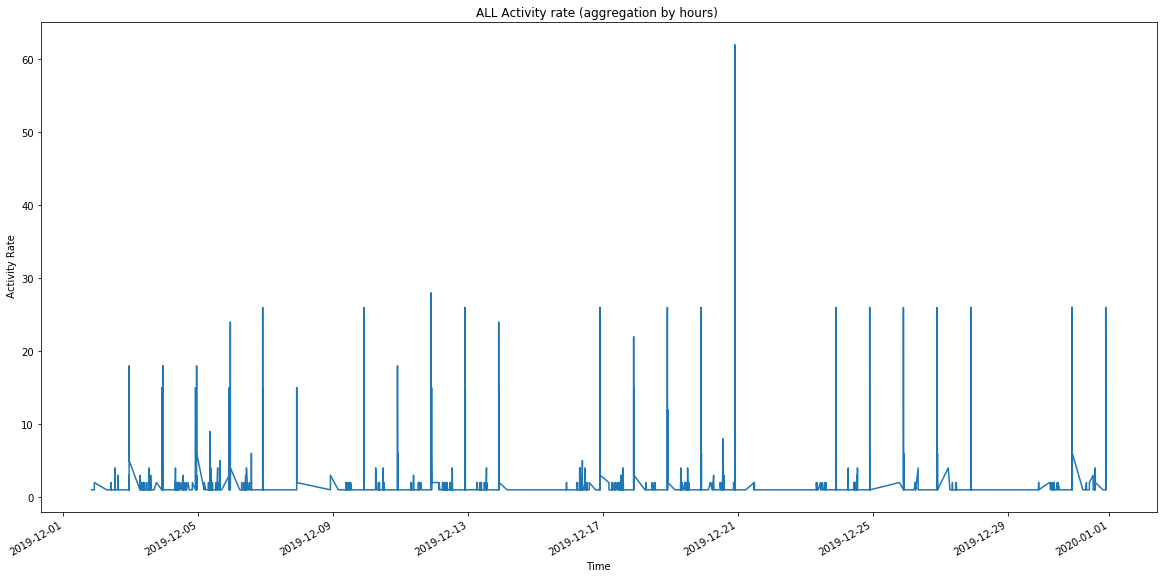

In [16]:
groupped_data = df.groupby(['year','month','day','hour','user_id','event_type']).agg({'count': 'size'})

print('COUNT MAX :')
m=(groupped_data.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
print(max_act)

print("")
print("user_id with maximum activity count ")
max_act.reset_index(drop=False, inplace=True)
user_id = max_act['user_id'].iloc[0]
print(user_id)

print("---------------------------------------------------")
anom_user = df[df["user_id"] == user_id]
#anom_user = anom_user['2019']
clients = anom_user[['cl0','cl1','cl2','cl3','cl4']]
cl0 = anom_user['cl0']
cl1 = anom_user['cl1']
cl2 = anom_user['cl2']
cl3 = anom_user['cl3']
cl4 = anom_user['cl4']

print('client 0 ')
print(cl0.value_counts())
print('client 1 ')
print(cl1.value_counts())
print('client 2 ')
print(cl2.value_counts())
print('client 3 ')
print(cl3.value_counts())
print('client 4 ')
print(cl4.value_counts())

print("---------------------------------------------------")
upper_limit , anom = find_anomalies(groupped_data['count'])
print("")
print('Events count superior than the upper_limit( hours based) ')
print(groupped_data[groupped_data['count']> upper_limit ])

print("---------------------------------------------------")

groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour']), axis=1)
dm.drop(['year', 'month','day','hour'], axis=1, inplace=True)

#plotting the count graphic/ figure 
dm2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('ALL Activity rate (aggregation by hours) ')
plt.ylabel(' Activity Rate')
plt.xlabel('Time')

plt.show() 


In [17]:
#checking for a suspicious user_id
df[df['user_id']== 269770 ].head()

,_id,event_type,user_id,user_type,cl0,cl1,cl2,cl3,cl4,profiles.0.role_code,...,profiles.5.application_code,_class,year,week,month,day,hour,minutes,secondes,count
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-28 21:47:35.172000+00:00,5e7b88c2d21b7c586871edfc,PROFILE_CREATED,269770,STANDARD,54041,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,9,2,28,21,47,35,0
2020-02-28 21:47:35.582000+00:00,5e7b88c2d21b7c586871edfd,PROFILE_CREATED,269770,STANDARD,54041,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,9,2,28,21,47,35,0
2020-02-28 21:47:36.013000+00:00,5e7b88c2d21b7c586871edfe,PROFILE_CREATED,269770,STANDARD,54041,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,9,2,28,21,47,36,0
2020-02-28 21:47:36.354000+00:00,5e7b88c2d21b7c586871edff,PROFILE_CREATED,269770,STANDARD,54041,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,9,2,28,21,47,36,0
2020-02-28 21:47:36.787000+00:00,5e7b88c2d21b7c586871ee00,PROFILE_CREATED,269770,STANDARD,54041,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,9,2,28,21,47,36,0


## User and Clients Activity rate

### 2019 data

In [18]:
gr19 = df['2019'].groupby(['year','month','day','hour','minutes','user_id','event_type','cl0','cl1','cl2','cl3','cl4'
                                   ]).agg({'count': 'size'})
#gr19 = df['2019'].groupby(['year','month','day','hour','user_id','cl0','cl1','cl2','cl3','cl4'
                                   #]).agg({'count': 'size'})
print(" clients and users Groupped Data :")
print(gr19)

print("")

print('COUNT MAX :')
m = (gr19.max()).iloc[0]
print(m)
print("---------------------------------------------")
upper_limit , anom = find_anomalies(gr19['count'])
print("---------------------------------------------")

print("")
print(' Events surpassing the threshold limit obtained per (user_id and clients) per ( min-hour-day-month):  ')
print(gr19[ gr19['count'] > upper_limit ])


gr19.reset_index(drop=False ,inplace= True)
dm = gr19.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], x['hour'] ,x['minutes']), axis=1)


 clients and users Groupped Data :
                                                                                       count
year month day hour minutes user_id event_type      cl0    cl1    cl2    cl3    cl4         
2019 5     22  11   25      180009  PROFILE_UPDATED 343298 36     222737 214914 22780      2
                    28      422262  PROFILE_UPDATED 14166  19939  21567  20948  11061     90
               20   2       180009  PROFILE_UPDATED 343298 36     222737 214914 22780      2
                            422262  PROFILE_UPDATED 14166  19939  21567  20948  11061      6
           28  6    39      404132  PROFILE_CREATED 10260  192565 7035   323209 3444       1
...                                                                                      ...
     12    20  21   47      196338  PROFILE_UPDATED 18034  7935   5918   22419  20929     32
                            296487  PROFILE_UPDATED 18034  20896  21511  20970  19334      1
                    48      196338 

### Visualization within a specific timespan

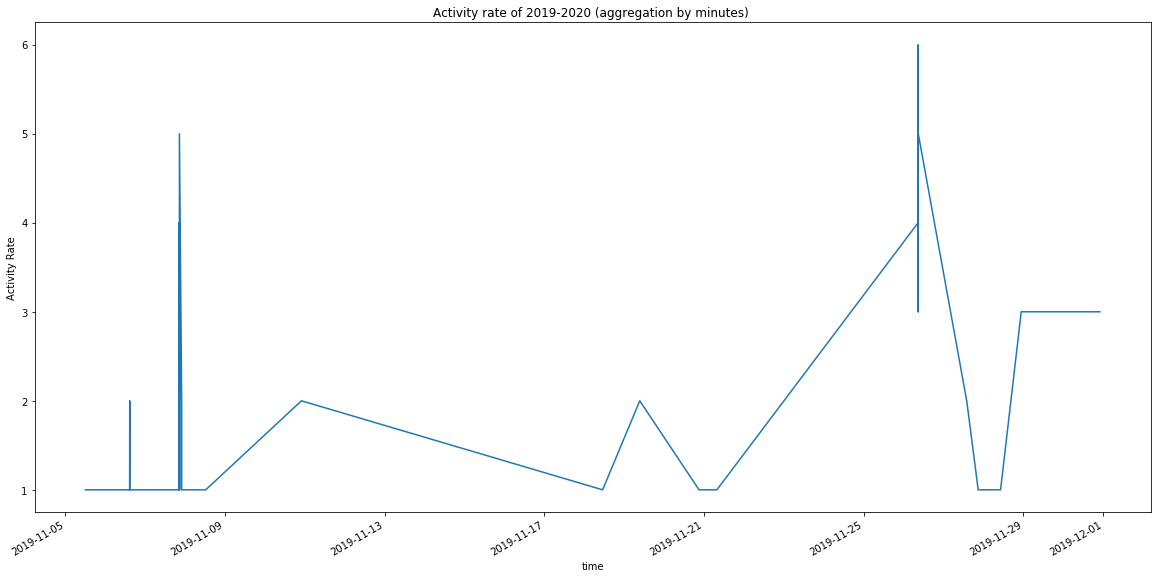

In [19]:
dm2 = dm.loc['2019-11-01':'2019-11-30']
dm2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Activity rate of 2019-2020 (aggregation by minutes) ')
plt.ylabel('Activity Rate')
plt.xlabel('time')

plt.show() 

### 2020 data

In [20]:
gr20 = df['2020'].groupby(['year','month','day','hour','minutes','user_id',\
                           'event_type','cl0','cl1','cl2','cl3','cl4'\
                                   ]).agg({'count': 'size'})

print(" clients and users Groupped Data")
print(gr20)

print("")
print('COUNT MAX :')
m = (gr20.max()).iloc[0]
print(m)
print("---------------------------------------------")
upper_limit , anom = find_anomalies(gr20['count'])
print("---------------------------------------------")

print("")
print(' Events outside of the upper limit per user_id+clients per min-hour-day-month:  ')
print(gr20[ gr20['count'] > upper_limit ])


gr20.reset_index(drop=False ,inplace= True)
dm = gr20.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], x['hour'] ,x['minutes']), axis=1)


 clients and users Groupped Data
                                                                                                                                       count
year month day hour minutes user_id event_type      cl0        cl1    cl2                       cl3                          cl4            
2020 1     1   21   48      180009  PROFILE_UPDATED 194588     214914 20970                     17523                        222737        3
               22   2       180009  PROFILE_UPDATED 194588     214914 20970                     17523                        222737        3
                            270822  PROFILE_UPDATED 99999-HCOM 56776  99999-eenfanceJDES-100012 BLenfanceBergerLevraultVille BLEVILLE      1
                            286382  PROFILE_UPDATED 21139      894    Clairvillage              99999-eenfanceJDES-100012    BLEVILLE      1
           2   21   49      180009  PROFILE_UPDATED 194588     214914 20970                     17523                    

In [21]:
dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)

#saving results to csv file under the results_data directory
#file_csv = "2020_saas.csv"

#csp = str(Path(results_data_dir))
#out_path = csp + "/" + file_csv

#dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

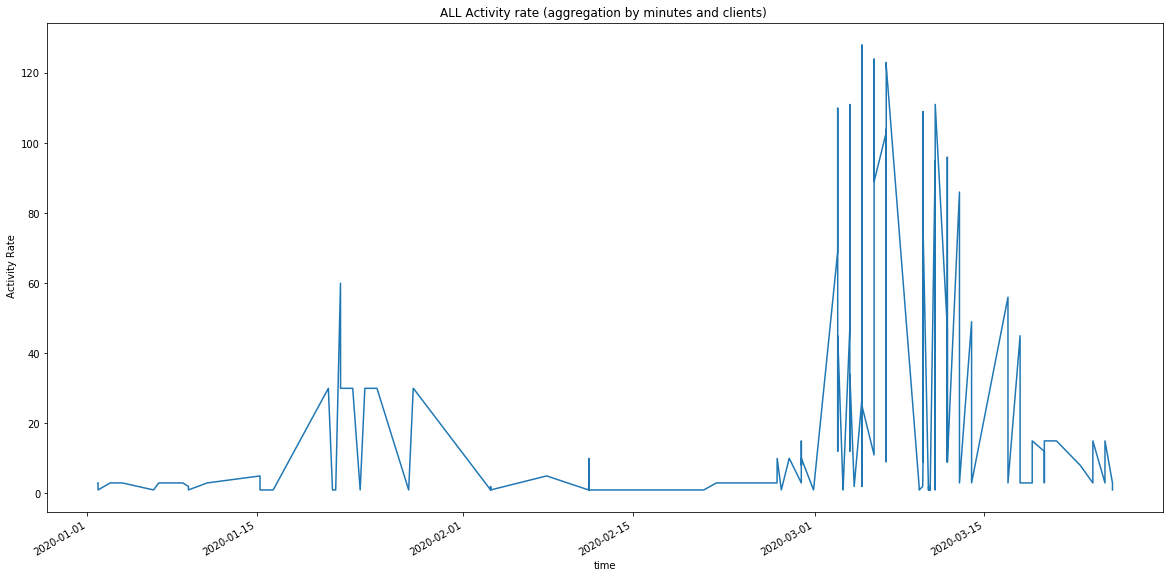

In [22]:
#plotting the count graphic/ figure 
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('ALL Activity rate (aggregation by minutes and clients) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

### All saas data by Minutes

 clients and users Groupped Data
                                                                                        count
year month day hour minutes user_id event_type      cl0    cl1    cl2    cl3    cl4          
2019 5     22  11   25      180009  PROFILE_UPDATED 343298 36     222737 214914 22780       2
                    28      422262  PROFILE_UPDATED 14166  19939  21567  20948  11061      90
               20   2       180009  PROFILE_UPDATED 343298 36     222737 214914 22780       2
                            422262  PROFILE_UPDATED 14166  19939  21567  20948  11061       6
           28  6    39      404132  PROFILE_CREATED 10260  192565 7035   323209 3444        1
...                                                                                       ...
2020 3     23  22   47      456890  PROFILE_UPDATED 235105 523036 266726 266534 237239     15
           24  22   47      290306  PROFILE_UPDATED 254048 255153 235387 392111 513034      3
                           

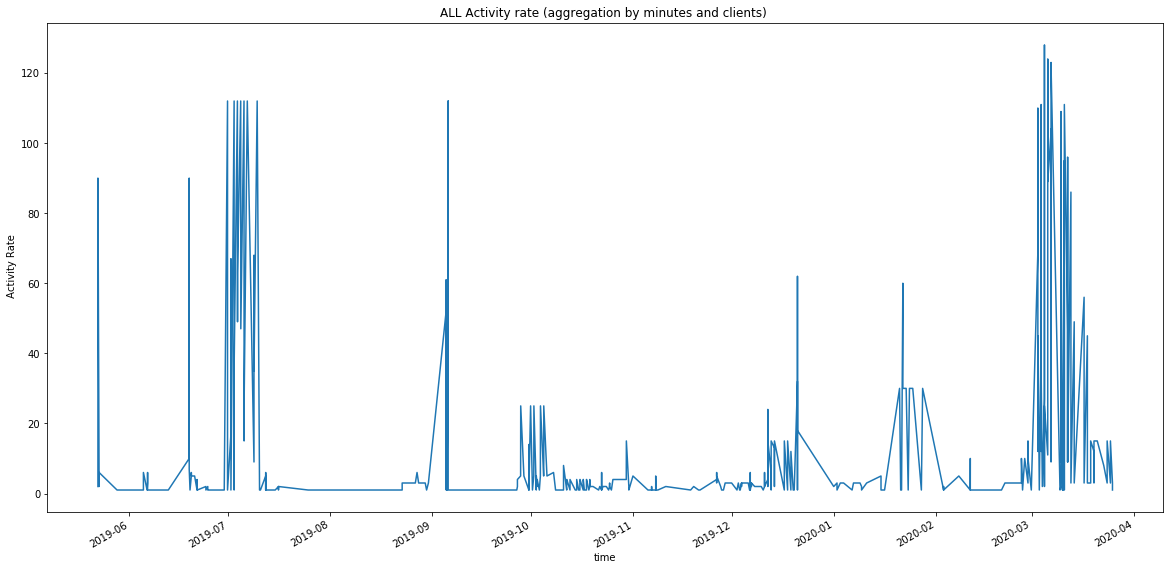

In [23]:
gr = df.groupby(['year','month','day','hour','minutes','user_id',\
                 'event_type','cl0','cl1','cl2','cl3','cl4'\
                                   ]).agg({'count': 'size'})

print(" clients and users Groupped Data")
print(gr)

print("")
print('COUNT MAX :')
m = (gr.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
print(max_act)

print("")
print("user_id with maximum activity count ")
max_act.reset_index(drop=False, inplace=True)
user_id = max_act['user_id']
print(user_id)

print("---------------------------------------------")
upper_limit , anom = find_anomalies(gr['count'])
print("---------------------------------------------")

print("")
print(' Events outside of the upper limit per user_id+clients per min-hour-day-month:  ')
evt_anom = gr[ gr['count'] > upper_limit ]
print(evt_anom )

#redifing the dataframe index
gr.reset_index(drop=False ,inplace= True)
dm = gr.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], x['hour'],x['minutes']), axis=1)


#plotting the count graphic/ figure 
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('ALL Activity rate (aggregation by minutes and clients) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

In [24]:
dm.drop(['year', 'month','day','hour' ,'minutes'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "saas_min_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

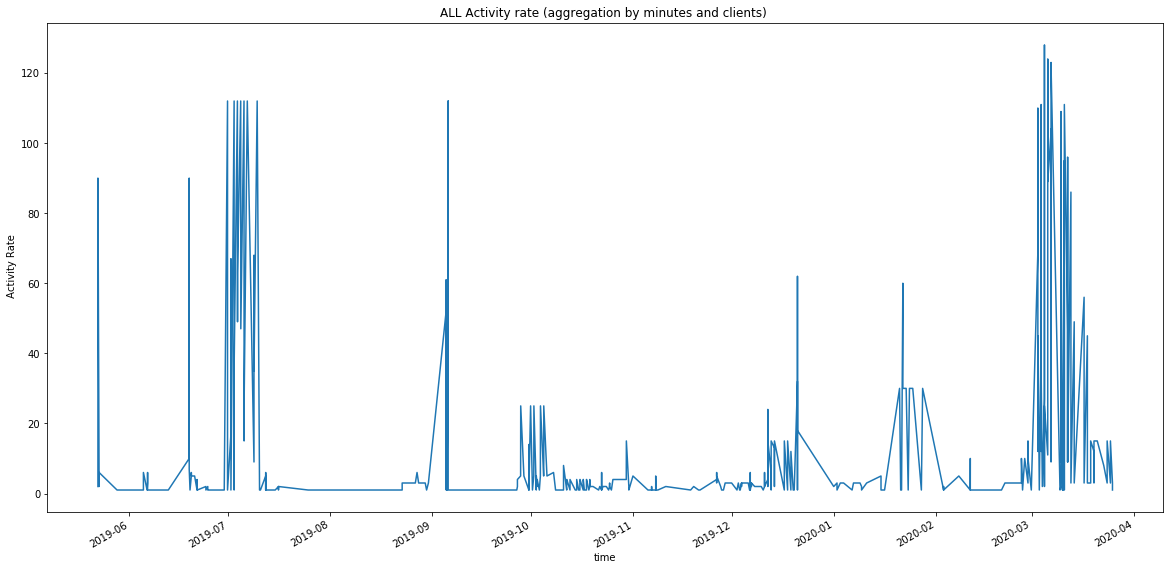

In [25]:
#plotting the count graphic/ figure 
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('ALL Activity rate (aggregation by minutes and clients) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

## All activity by seconds

In [26]:
gr = df.groupby(['year','month','day','hour','minutes','secondes',\
                 'user_id','event_type','cl0','cl1','cl2','cl3','cl4'\
                                   ]).agg({'count': 'size'})

print(" clients and users Groupped Data")
print(gr)

print("")
print('COUNT MAX :')
m = (gr.max()).iloc[0]
print(m)





 clients and users Groupped Data
                                                                                                 count
year month day hour minutes secondes user_id event_type      cl0    cl1    cl2    cl3    cl4          
2019 5     22  11   25      50       180009  PROFILE_UPDATED 343298 36     222737 214914 22780       2
                    28      14       422262  PROFILE_UPDATED 14166  19939  21567  20948  11061       2
                            15       422262  PROFILE_UPDATED 14166  19939  21567  20948  11061       5
                            16       422262  PROFILE_UPDATED 14166  19939  21567  20948  11061       6
                            17       422262  PROFILE_UPDATED 14166  19939  21567  20948  11061       3
...                                                                                                ...
2020 3     24  22   47      14       456890  PROFILE_UPDATED 235105 523036 266726 266534 237239      7
                            15       456

In [27]:
print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
print(max_act)

print("")
print("user_id with maximum activity count ")
max_act.reset_index(drop=False, inplace=True)
user_id = max_act['user_id']
print(user_id)



Maximum Activity details: 
       year  month  day  hour  user_id       event_type  count
734    2019      5   22    11   422430  PROFILE_UPDATED     30
13248  2019      9   10    13   430761  PROFILE_UPDATED     30
15135  2019      9   27    20   401328  PROFILE_UPDATED     30
15564  2019     10    1    20   401328  PROFILE_UPDATED     30
15949  2019     10    3    20   401328  PROFILE_UPDATED     30
16078  2019     10    4    20   401328  PROFILE_UPDATED     30
23676  2019     12    3    22   206842  PROFILE_UPDATED     30
23687  2019     12    3    22   404242  PROFILE_UPDATED     30
24037  2019     12    4    22   206842  PROFILE_UPDATED     30
24041  2019     12    4    22   404242  PROFILE_UPDATED     30
24395  2019     12    5    22   206842  PROFILE_UPDATED     30
24409  2019     12    5    22   404242  PROFILE_UPDATED     30
25419  2019     12   11    21   446285  PROFILE_UPDATED     30
34562  2020      1   16    22   210997  PROFILE_UPDATED     30
35375  2020      1   20    

In [28]:
print("---------------------------------------------")
upper_limit , anom = find_anomalies(gr['count'])


---------------------------------------------
DATA MEAN :
2.2297952586206895
  STD : 
2.5766788469839397

 Anomaly_cut_off value (aka std * 3 value) 
7.730036540951819

   LIMIT VALUES  :
upper_limit value
9.959831799572509
lower_limit value
-5.500241282331129


In [29]:
print("---------------------------------------------")
print("")
print(' Events outside of the upper limit per user_id+clients per seconds-min-hour-day-month:  ')
evt_anom = gr[ gr['count'] > upper_limit ]
evt_anom

---------------------------------------------

 Events outside of the upper limit per user_id+clients per seconds-min-hour-day-month:  


count
year month day hour minutes secondes user_id event_type      cl0    cl1    cl2    cl3    cl4          
2019 6     30  20   2       15       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       22
                            16       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       23
                            17       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       22
                            18       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       22
                            19       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       20
     7     2   20   2       10       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       17
                            11       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       11
                            12       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       21
                            13       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       24
                            14       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       24
                            15       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       14
           3   20   2       10       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       23
                            12       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       23
                            13       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       10
                            14       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       18
                            15       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       22
           4   20   2       9        196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       14
                            11       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       24
                            12       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       26
                            13       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       24
                            14       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       16
           5   20   2       14       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       21
                            15       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       25
                            16       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       27
                            17       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       20
           6   20   2       9        196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       24
                            11       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       20
                            12       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       27
                            13       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       23
           9   20   2       9        196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       10
                            10       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       25
                            11       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       22
                            12       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       24
                            13       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       25
     9     5   20   2       10       180009  PROFILE_UPDATED 343298 36     222737 214914 22780      10
                            11       180009  PROFILE_UPDATED 343298 36     222737 214914 22780      22
                            17       196338  PROFILE_UPDATED 24387  5748   7935   15779  3093       10
                            18       196338  PROFILE_UPDATED 24387  5748   7935 

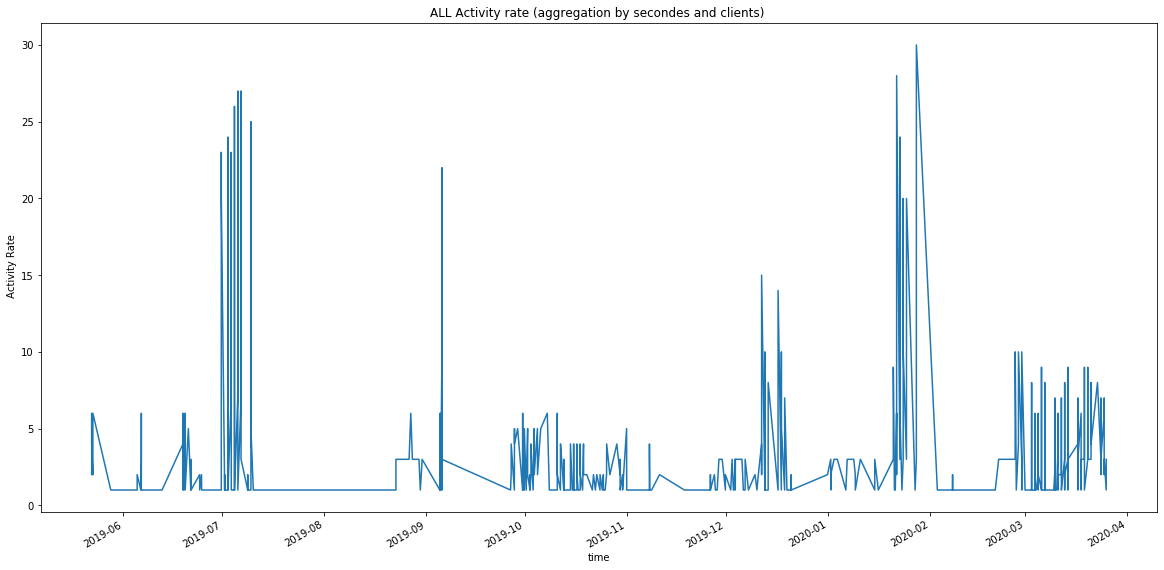

In [30]:
#redifing the dataframe index
gr.reset_index(drop=False ,inplace= True)
dm = gr.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], \
                                          x['hour'],x['minutes'],x['secondes']), axis=1)

#plotting the count graphic/ figure 
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('ALL Activity rate (aggregation by secondes and clients) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

In [31]:
dm.drop(['year', 'month','day','hour' ,'minutes','secondes'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "saas_sec_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## checking the clients list

In [32]:
#users_cl = df[['user_id','cl0','cl1','cl2','cl3','cl4']]
#anom_user['cl0'].to_list()
evt_anom.reset_index(drop=False ,inplace= True) 
evt_anom.index = evt_anom.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], x['hour'],x['minutes']), axis=1)
evt_anom.drop(['year', 'month','day','hour'], axis=1, inplace=True)
evt_anom

C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,minutes,secondes,user_id,event_type,cl0,cl1,cl2,cl3,cl4,count
2019-06-30 20:02:00,2,15,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,22
2019-06-30 20:02:00,2,16,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,23
2019-06-30 20:02:00,2,17,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,22
2019-06-30 20:02:00,2,18,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,22
2019-06-30 20:02:00,2,19,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,20
2019-07-02 20:02:00,2,10,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,17
2019-07-02 20:02:00,2,11,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,11
2019-07-02 20:02:00,2,12,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,21
2019-07-02 20:02:00,2,13,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,24
2019-07-02 20:02:00,2,14,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,24


In [33]:
#test = evt_anom.copy()
#test.dropna(inplace=True)
#test = test[['user_id','cl0','cl1','cl2','cl3','cl4']]
#test.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)

#test.reset_index(drop=True, inplace=True)

In [34]:
#test
#test.drop_duplicates()
evt_anom[evt_anom['user_id'] == 196338 ]

,minutes,secondes,user_id,event_type,cl0,cl1,cl2,cl3,cl4,count
2019-06-30 20:02:00,2,15,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,22
2019-06-30 20:02:00,2,16,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,23
2019-06-30 20:02:00,2,17,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,22
2019-06-30 20:02:00,2,18,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,22
2019-06-30 20:02:00,2,19,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,20
2019-07-02 20:02:00,2,10,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,17
2019-07-02 20:02:00,2,11,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,11
2019-07-02 20:02:00,2,12,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,21
2019-07-02 20:02:00,2,13,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,24
2019-07-02 20:02:00,2,14,196338,PROFILE_UPDATED,24387,5748,7935,15779,3093,24


    we notice that at 2020-03-02 21:49:00 ,the clients list changes for the user_id 196338

In [35]:
#The following function checks a given group to see if that customer/client existed a day prior.
import datetime

def existedBefore(g):
    # if the difference between the max and min timestamp values is less than one day
     # then return False.  Otherwise, return True
     # if the group only has 1 row, then max and min are the same
     # so this check still works
        if g.index.max() - g.index.min() >= datetime.timedelta(1):
            return True
        return False

In [36]:
groups1 = evt_anom[evt_anom['user_id'] == 196338 ].groupby(['cl0', 'cl1','cl2','cl3','cl4'])
#[df['user_id'] == 422262]


#for key, item in groups:
    #print(groups.get_group(key), "\n\n")
    
#Now if we run:
groups1.apply(existedBefore)

cl0    cl1   cl2   cl3    cl4 
24387  5748  7935  15779  3093    True
dtype: bool

In [37]:
groups2 = evt_anom[evt_anom['user_id'] == 422262 ].groupby(['cl0', 'cl1','cl2','cl3','cl4'])
groups2.apply(existedBefore)

""


In [38]:
evt_anom[evt_anom['user_id'] == 422262 ]

,minutes,secondes,user_id,event_type,cl0,cl1,cl2,cl3,cl4,count


In [39]:
groups3 = evt_anom[evt_anom['user_id'] == 269770 ].groupby(['cl0', 'cl1','cl2','cl3','cl4'])
groups3.apply(existedBefore)

""


In [40]:
evt_anom[evt_anom['user_id'] == 269770 ]

,minutes,secondes,user_id,event_type,cl0,cl1,cl2,cl3,cl4,count
